In [1]:
import seaborn as sns
import pandas as pd

rtimes=pd.read_csv('results_new.tsv', sep='\t', header=0)
rtimes["Group"] = rtimes["Data"] +"-"+ rtimes["Environment"]
rtimes['Tool'] = rtimes['Tool'].astype('category')
rtimes['Data'] = rtimes['Data'].astype('category')
rtimes['Environment'] = rtimes['Environment'].astype('category')
rtimes['Group'] = rtimes['Group'].astype('category')
rtimes

,Tool,Data,Environment,Time(s),Group
0,getorf,A. thal (120 MB),PC,8.33,A. thal (120 MB)-PC
1,getorf,A. thal (120 MB),HPC,14.00,A. thal (120 MB)-HPC
2,getorf,Human (370 MB),PC,77.67,Human (370 MB)-PC
3,getorf,Human (370 MB),HPC,85.00,Human (370 MB)-HPC
4,getorf,Bac (1.5 GB),PC,254.67,Bac (1.5 GB)-PC
5,getorf,Bac (1.5 GB),HPC,274.66,Bac (1.5 GB)-HPC
6,orfipy,A. thal (120 MB),PC,11.00,A. thal (120 MB)-PC
7,orfipy,A. thal (120 MB),HPC,6.60,A. thal (120 MB)-HPC
8,orfipy,Human (370 MB),PC,42.33,Human (370 MB)-PC
9,orfipy,Human (370 MB),HPC,16.66,Human (370 MB)-HPC


Text(0.5, 0, 'Tool')

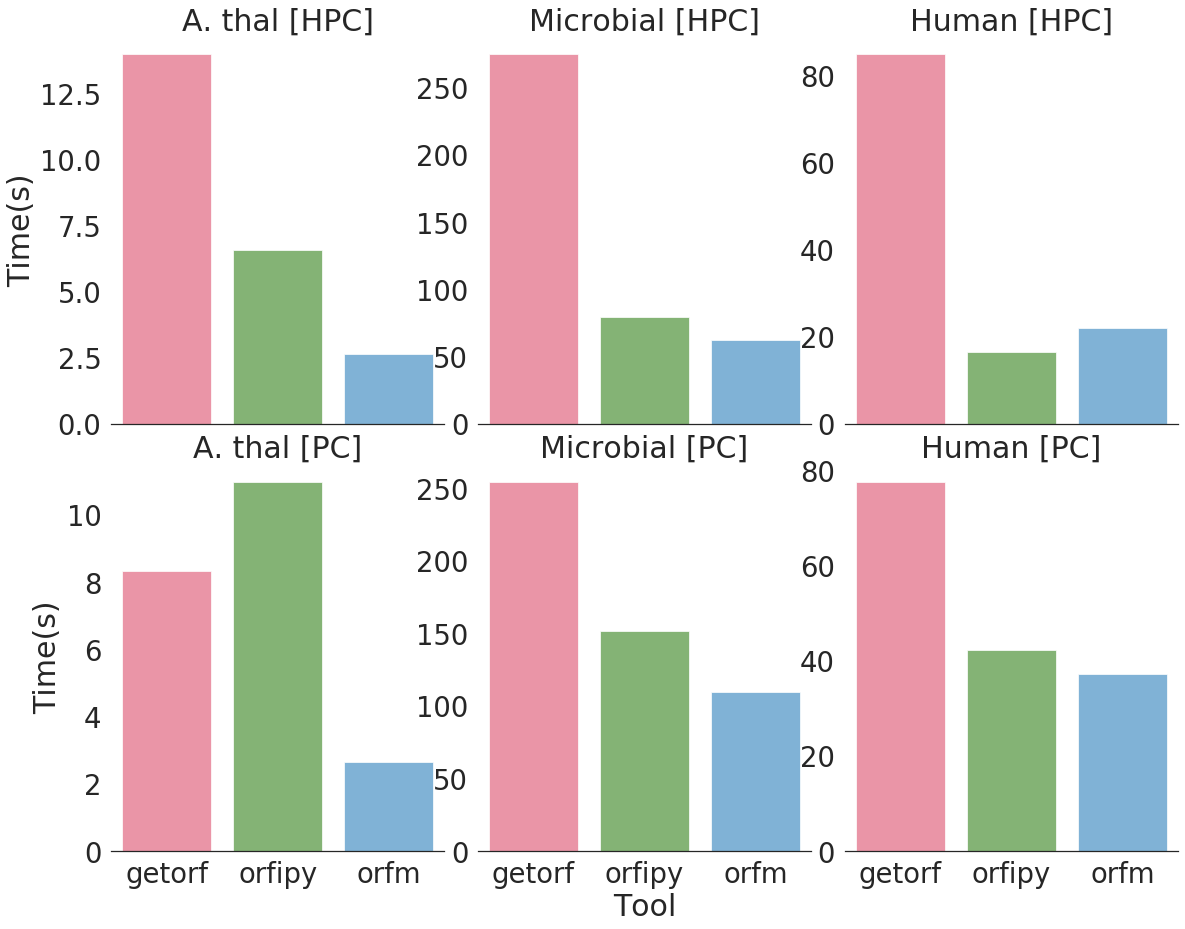

In [85]:
sns.set(font_scale=2.5,style="white")


g = sns.FacetGrid(rtimes, row="Environment",col="Data", hue="Tool",
                  palette=sns.color_palette(sns.husl_palette(3,l=0.6)),
                  sharey=False,sharex=True,legend_out=True,height=7.5, 
                  aspect=.85,gridspec_kws={"wspace":0.1,"hspace":0.1})
g.map(sns.barplot, "Tool", "Time(s)", alpha=.7,ci=None)
g.despine(left=True)
#g.add_legend()
#plt.legend(loc='upper left')



axes = g.axes.flatten()
axes[0].set_title("A. thal [HPC]")
axes[1].set_title("Microbial [HPC]")
axes[2].set_title("Human [HPC]")
axes[3].set_title("A. thal [PC]")
axes[4].set_title("Microbial [PC]")
axes[5].set_title("Human [PC]")
for ax in axes:
    ax.set_xlabel("")
axes[4].set_xlabel("Tool")
#g.fig.tight_layout()

/home/usingh/anaconda3/envs/orfipy/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
/home/usingh/anaconda3/envs/orfipy/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/usingh/anaconda3/envs/orfipy/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


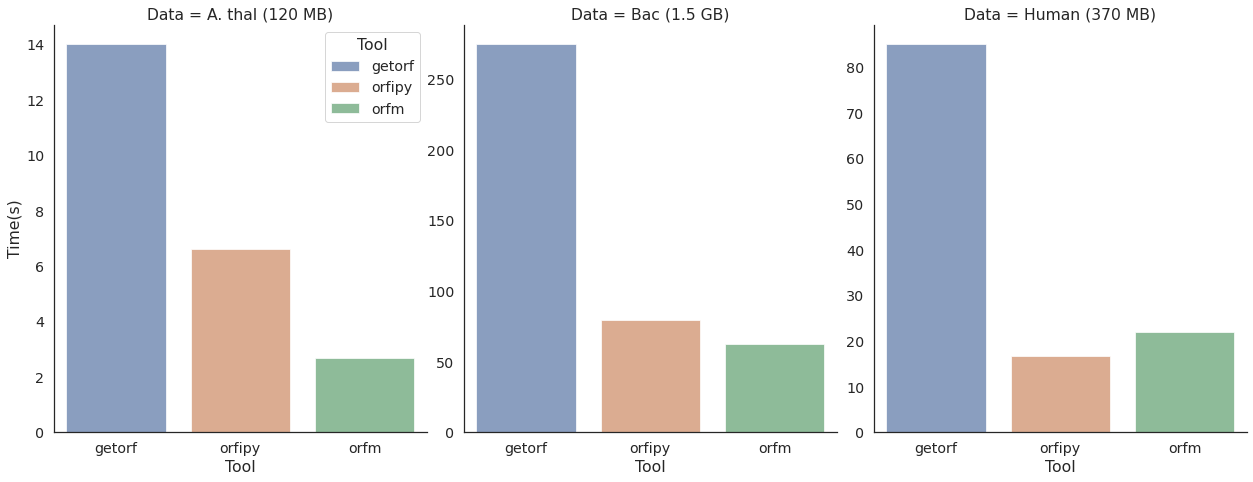

In [16]:
#create subset
#data_HPC=df.loc[df['column_name'] == some_value]
rtimes_hpc=rtimes[rtimes['Environment'] == 'HPC']
rtimes_hpc
colors = ["#ffdba9" ,"#ff95ca","#99d5ca"]
sns.set_palette(colors)

sns.set(font_scale=1.3,style="white")
g2 = sns.FacetGrid(rtimes_hpc, col="Data", hue="Tool",
                  sharey=False,legend_out=False,height=7.5, 
                  aspect=.95,gridspec_kws={"wspace":0.1,"hspace":0.1})
g2.map(sns.barplot, "Tool", "Time(s)", alpha=.7,ci=None)
g2.add_legend()